In [2]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

In [3]:
cs_df = pd.read_csv("https://uni-koeln.sciebo.de/s/59LhTdJ9c8tYgmn/download?path=%2F&files=charging_sessions.csv", index_col=0)

In [4]:
cs_df.columns

Index(['id', 'connectionTime', 'disconnectTime', 'doneChargingTime',
       'kWhDelivered', 'sessionID', 'siteID', 'spaceID', 'stationID',
       'timezone', 'userID', 'userInputs'],
      dtype='object')

In [5]:
cs_df.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [6]:
cs_df.describe()

,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,49187.000000
mean,11.787916,1.472656,1800.494582
std,10.314789,0.499256,2617.548614
min,0.501000,1.000000,1.000000
25%,5.097000,1.000000,431.000000
50%,9.140000,1.000000,818.000000
75%,14.183000,2.000000,1805.000000
max,108.797242,2.000000,19923.000000


In [7]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66450 entries, 0 to 10087
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                66450 non-null  object 
 1   connectionTime    66450 non-null  object 
 2   disconnectTime    66450 non-null  object 
 3   doneChargingTime  62362 non-null  object 
 4   kWhDelivered      66450 non-null  float64
 5   sessionID         66450 non-null  object 
 6   siteID            66450 non-null  int64  
 7   spaceID           66450 non-null  object 
 8   stationID         66450 non-null  object 
 9   timezone          66450 non-null  object 
 10  userID            49187 non-null  float64
 11  userInputs        49187 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 8.6+ MB


In [8]:
# Convert time fields to datetime type
cs_df['connectionTime'] = pd.to_datetime(cs_df['connectionTime'])
cs_df['disconnectTime'] = pd.to_datetime(cs_df['disconnectTime'])
cs_df['doneChargingTime'] = pd.to_datetime(cs_df['doneChargingTime'])

cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66450 entries, 0 to 10087
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                66450 non-null  object             
 1   connectionTime    66450 non-null  datetime64[ns, UTC]
 2   disconnectTime    66450 non-null  datetime64[ns, UTC]
 3   doneChargingTime  62362 non-null  datetime64[ns, UTC]
 4   kWhDelivered      66450 non-null  float64            
 5   sessionID         66450 non-null  object             
 6   siteID            66450 non-null  int64              
 7   spaceID           66450 non-null  object             
 8   stationID         66450 non-null  object             
 9   timezone          66450 non-null  object             
 10  userID            49187 non-null  float64            
 11  userInputs        49187 non-null  object             
dtypes: datetime64[ns, UTC](3), float64(2), int64(1), object(6)
memory

In [9]:
cs_df.isnull().sum()

,0
id,0
connectionTime,0
disconnectTime,0
doneChargingTime,4088
kWhDelivered,0
sessionID,0
siteID,0
spaceID,0
stationID,0
timezone,0


In [10]:
#Store the cleaned dataset as ccs_df
ccs_df = cs_df.dropna(subset = ['doneChargingTime']).copy() #删除缺失doneChargingTime的行
ccs_df['isRegisteredUser'] = ccs_df['userID'].notna().astype(int) #保留缺失userID和userInputs的行，添加标志列，区分注册和未注册用户，用于观察行为模式差异

In [11]:
# Handle erroneous data
# Check if there are records where kWhDelivered is negative
invalid_kwh = ccs_df[ccs_df['kWhDelivered'] < 0]
print(f"Number of records with negative kWhDelivered: {len(invalid_kwh)}")

# Check if disconnectTime is earlier than connectionTime
invalid_time_order = ccs_df[ccs_df['disconnectTime'] < ccs_df['connectionTime']]
print(f"Number of records with disconnectTime earlier than connectionTime: {len(invalid_time_order)}")

# Check if doneChargingTime is between connectionTime and disconnectTime
invalid_done_charging = ccs_df[(ccs_df['doneChargingTime'] < ccs_df['connectionTime']) | (ccs_df['doneChargingTime'] > ccs_df['disconnectTime'])]
print(f"Number of records with invalid doneChargingTime: {len(invalid_done_charging)}")


Number of records with negative kWhDelivered: 0
Number of records with disconnectTime earlier than connectionTime: 0
Number of records with invalid doneChargingTime: 4719


In [12]:
# Remove records where doneChargingTime is not between connectionTime and disconnectTime
ccs_df = ccs_df[(ccs_df['doneChargingTime'] >= ccs_df['connectionTime']) & (ccs_df['doneChargingTime'] <= ccs_df['disconnectTime'])]

In [13]:
# Check the number of duplicated rows where all columns are identical
num_duplicates = ccs_df.duplicated().sum()
print(f"Number of duplicated records: {num_duplicates}")

Number of duplicated records: 1107


In [14]:
# Remove duplicate rows, keeping only the first occurrence
ccs_df = ccs_df.drop_duplicates()

len(ccs_df)

56536

In [15]:
#processes the userInputs column to convert string representations into lists of dictionaries, expands the first dictionary in each list into separate columns, and then merges these expanded columns back into the original DataFrame
ccs_df = pd.read_csv("https://uni-koeln.sciebo.de/s/59LhTdJ9c8tYgmn/download?path=%2F&files=charging_sessions.csv")

ccs_df['userInputs'] = ccs_df['userInputs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

ccs_df['userInputs'] = ccs_df['userInputs'].apply(lambda x: x if isinstance(x, list) else [])

user_input_expanded = ccs_df['userInputs'].apply(lambda x: x[0] if len(x) > 0 else {}).apply(pd.Series)

ccs_df = pd.concat([ccs_df, user_input_expanded], axis=1)

# Remove duplicate userID columns
ccs_df = ccs_df.loc[:, ~ccs_df.columns.duplicated()]

ccs_df.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",250.0,25.0,100.0,463.0,"Thu, 02 Jan 2020 13:09:39 GMT",True,"Thu, 02 Jan 2020 20:51:54 GMT"
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",280.0,70.0,250.0,595.0,"Thu, 02 Jan 2020 13:37:11 GMT",True,"Thu, 02 Jan 2020 23:31:50 GMT"
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",400.0,8.0,20.0,60.0,"Thu, 02 Jan 2020 13:57:17 GMT",True,"Thu, 02 Jan 2020 14:56:35 GMT"
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",400.0,8.0,20.0,65.0,"Thu, 02 Jan 2020 14:00:03 GMT",True,"Thu, 02 Jan 2020 15:04:58 GMT"
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",400.0,16.0,40.0,504.0,"Thu, 02 Jan 2020 14:00:13 GMT",True,"Thu, 02 Jan 2020 22:24:01 GMT"


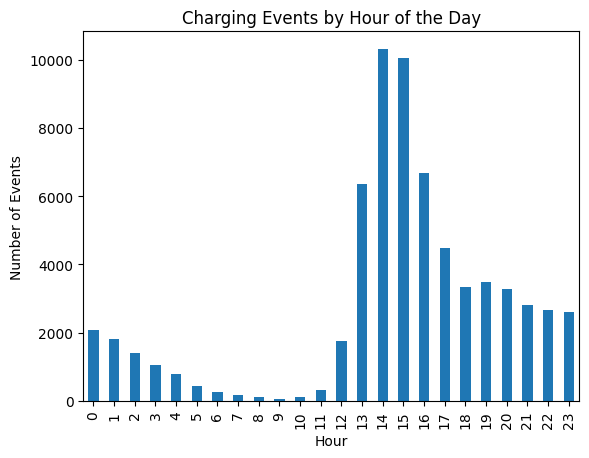

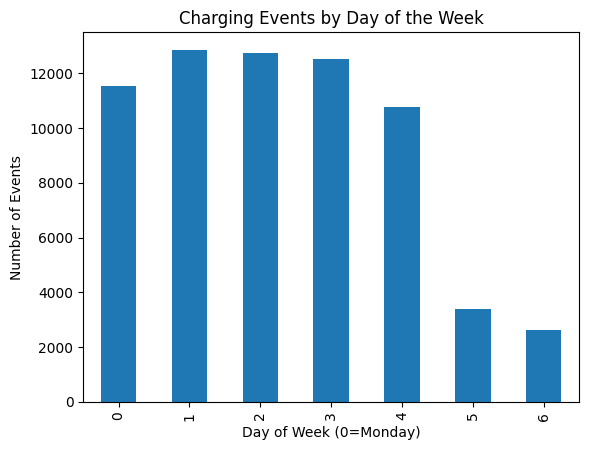

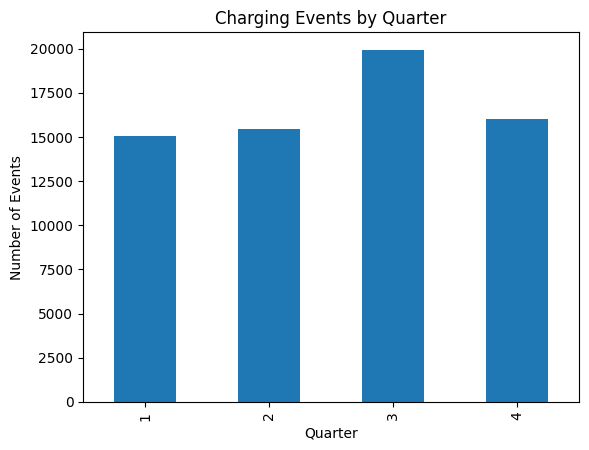

In [16]:
# ---------------- Time Dimension Extraction ----------------
cs_df['hour'] = cs_df['connectionTime'].dt.hour         # Hour
cs_df['weekday'] = cs_df['connectionTime'].dt.weekday   # Day of the week (0=Monday, 6=Sunday)
cs_df['quarter'] = cs_df['connectionTime'].dt.quarter   # Quarter

# ---------------- Daily Pattern ----------------
hourly_counts = cs_df.groupby('hour').size()  # Count by hour
plt.figure()
hourly_counts.plot(kind='bar')
plt.title('Charging Events by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Events')
plt.show()

# ---------------- Weekly Pattern ----------------
weekday_counts = cs_df.groupby('weekday').size()  # Count by day of the week
plt.figure()
weekday_counts.plot(kind='bar')
plt.title('Charging Events by Day of the Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Number of Events')
plt.show()

# ---------------- Seasonal Pattern ----------------
quarterly_counts = cs_df.groupby('quarter').size()  # Count by quarter
plt.figure()
quarterly_counts.plot(kind='bar')
plt.title('Charging Events by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Events')
plt.show()

### Daily Pattern
- Trend: Charging events are lowest in the early morning (6-10 AM) and peak around midday to early afternoon (12-3 PM), then gradually decrease through the evening.
- Explanation: Morning lows align with active vehicle usage during commutes, while the midday peak reflects charging during breaks or mid-day stops. Evening activity corresponds to vehicles returning home.

### Weekly Pattern
- Trend: Charging events are significantly higher on weekdays (Monday to Thursday) and decrease toward the weekend, with Saturday and Sunday being the lowest.
- Explanation: Weekday peaks are driven by commuting and work-related vehicle use, while weekend lows reflect reduced vehicle activity and charging.

### Seasonal Pattern
- Trend: Charging events are highest in Q3 (July-September) and relatively stable across Q1 (January-March), Q2 (April-June), and Q4 (October-December), with a slight decrease in Q4.
- Explanation: The Q3 peak may be due to summer travel and increased mobility, while winter months might see more charging due to reduced battery efficiency in colder weather.

<ipython-input-17-1a0a3235ec14>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  cs_df['hour'] = cs_df['connectionTime'].dt.floor('H')


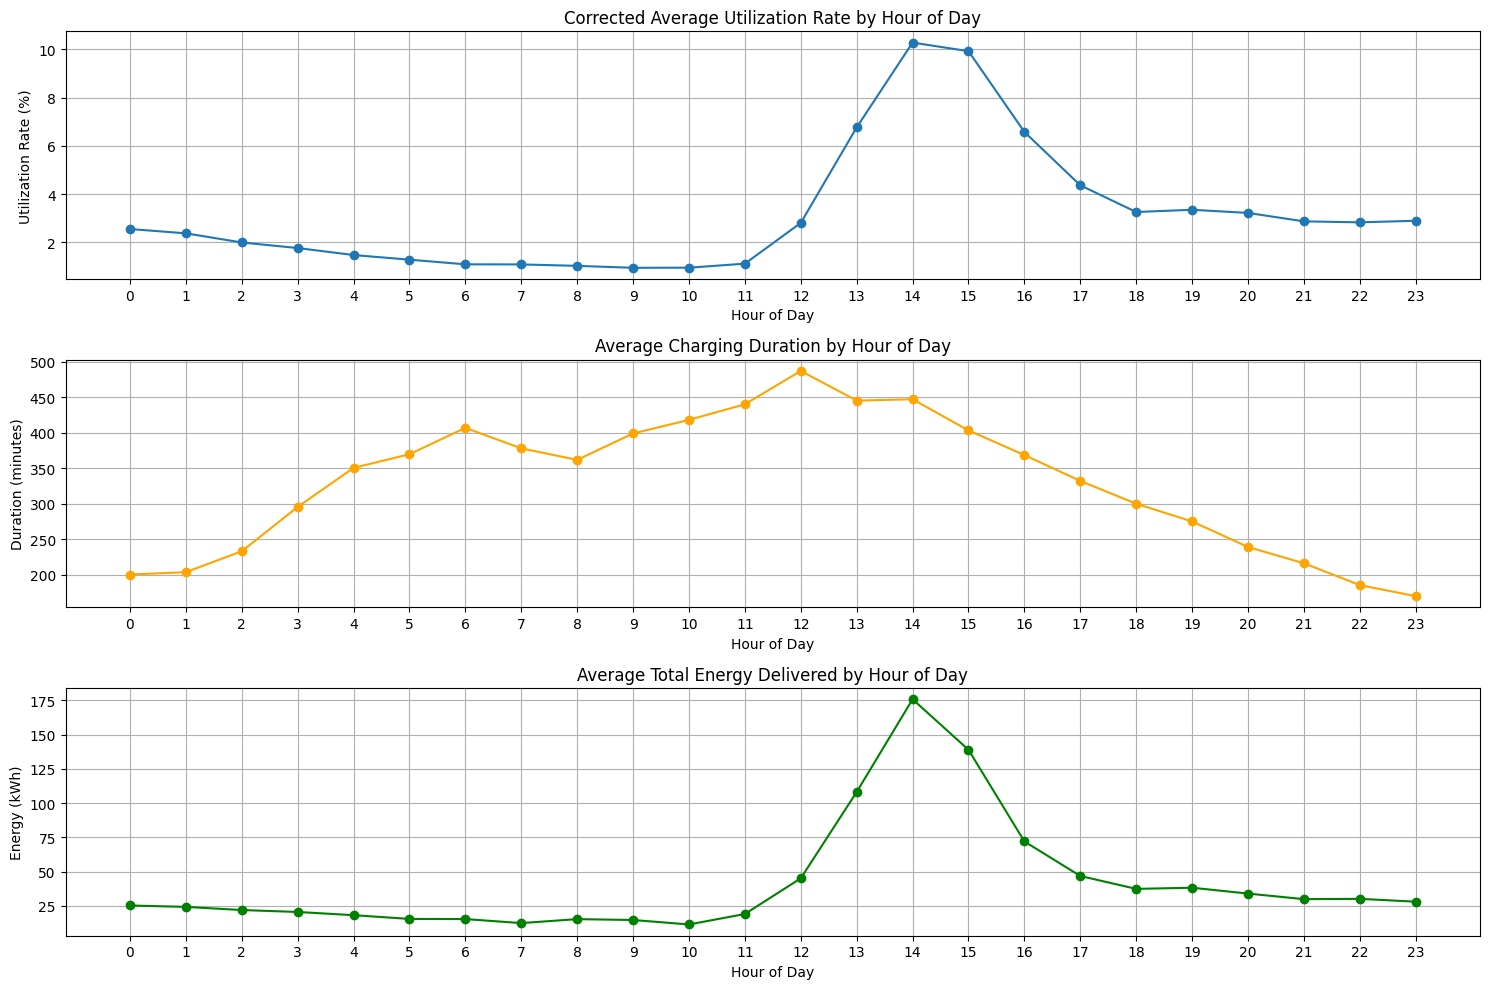

In [17]:
# Calculate hourly charging utilization rate
cs_df['hour'] = cs_df['connectionTime'].dt.floor('H')
unique_stations = cs_df['stationID'].nunique()  # Total number of charging stations
utilization_corrected = cs_df.groupby('hour')['stationID'].nunique() / unique_stations * 100

# Calculate average charging duration per hour (in minutes)
cs_df['charging_duration'] = (cs_df['disconnectTime'] - cs_df['connectionTime']).dt.total_seconds() / 60
average_duration = cs_df.groupby('hour')['charging_duration'].mean()

# Calculate total energy delivered per hour (in kWh)
total_energy = cs_df.groupby('hour')['kWhDelivered'].sum()

# Create a DataFrame containing key performance indicators (KPIs)
kpi_df_corrected = pd.DataFrame({
    'Utilization Rate (%)': utilization_corrected,
    'Average Charging Duration (minutes)': average_duration,
    'Total Energy Delivered (kWh)': total_energy
}).reset_index()

# Add a column for the hour of the day (0-23)
kpi_df_corrected['hour_of_day'] = kpi_df_corrected['hour'].dt.hour

# Calculate average values for each hour of the day
daily_kpi_summary_corrected = kpi_df_corrected.groupby('hour_of_day').mean().reset_index()

# Visualization
plt.figure(figsize=(15, 10))

# Utilization rate
plt.subplot(3, 1, 1)
plt.plot(daily_kpi_summary_corrected['hour_of_day'], daily_kpi_summary_corrected['Utilization Rate (%)'], label='Utilization Rate', marker='o')
plt.title('Corrected Average Utilization Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Utilization Rate (%)')
plt.xticks(range(24))
plt.grid()

# Average charging duration
plt.subplot(3, 1, 2)
plt.plot(daily_kpi_summary_corrected['hour_of_day'], daily_kpi_summary_corrected['Average Charging Duration (minutes)'], label='Avg Charging Duration', color='orange', marker='o')
plt.title('Average Charging Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Duration (minutes)')
plt.xticks(range(24))
plt.grid()

# Total energy delivered
plt.subplot(3, 1, 3)
plt.plot(daily_kpi_summary_corrected['hour_of_day'], daily_kpi_summary_corrected['Total Energy Delivered (kWh)'], label='Total Energy Delivered', color='green', marker='o')
plt.title('Average Total Energy Delivered by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Energy (kWh)')
plt.xticks(range(24))
plt.grid()

plt.tight_layout()
plt.show()

### Rationale Behind Selecting Each KPI
1. Utilization Rate
- Definition: Percentage of charging stations in use each hour.
- Reason: Measures resource efficiency and identifies peak and off-peak usage times, helping optimize operations.
- Reference: Commonly used in EV infrastructure studies to evaluate station performance.
2. Average Charging Duration
- Definition: Average duration of charging sessions per hour (in minutes).
- Reason: Indicates station turnover rates and helps reduce wait times by understanding user behavior.
- Reference: EV studies highlight charging duration as a key metric for user behavior analysis.
3. Total Energy Delivered
- Definition: Total energy delivered per hour (in kWh).
- Reason: Reflects operational revenue and demand intensity, directly tied to business performance.
- Reference: Industry practices recommend this metric for assessing station profitability and usage patterns.

### Observed Trends and Explanation
1. Utilization Rate
- Trends: Low usage during early morning (0:00-6:00), peaks during daytime (7:00-18:00), and decreases at night (19:00-23:00).
- Explanation: Matches typical commuting and activity patterns, indicating higher daytime charging demand.
2. Average Charging Duration
- Trends: Longer durations at night and early morning, shorter during the day.
- Explanation: Reflects overnight full charges versus shorter daytime top-ups.
3. Total Energy Delivered
- Trends: Low energy use at night (0:00-6:00), peaks in the afternoon, and decreases in the evening.
- Explanation: Aligns with utilization trends, highlighting concentrated energy demand during peak hours.

In [18]:
# Data preprocessing
cs_df['connectionTime'] = pd.to_datetime(cs_df['connectionTime'])
cs_df['disconnectTime'] = pd.to_datetime(cs_df['disconnectTime'])
cs_df['session_duration'] = (cs_df['disconnectTime'] - cs_df['connectionTime']).dt.total_seconds() / 3600

# Group by site and calculate key metrics
site_summary = cs_df.groupby('siteID').agg({
    'kWhDelivered': ['mean', 'median', 'std', 'sum', 'count'],
    'userID': pd.Series.nunique,
    'session_duration': 'mean'
}).rename(columns={'nunique': 'unique_users'})

# Rename columns for better readability
site_summary.columns = ['avg_kWh', 'median_kWh', 'std_kWh', 'total_kWh', 'session_count', 'unique_users', 'avg_duration']

# Print the results
print(site_summary)

# Determine public site characteristics
if site_summary.loc[1, 'unique_users'] < site_summary.loc[2, 'unique_users'] and site_summary.loc[1, 'avg_duration'] > site_summary.loc[2, 'avg_duration']:
    print("Site 2 is more likely to be the public charging site.")
else:
    print("Site 1 is more likely to be the public charging site.")

          avg_kWh  median_kWh    std_kWh      total_kWh  session_count  \
siteID                                                                   
1       14.063156     11.2105  11.052229  492801.112774          35042   
2        9.249425      6.7150   8.752038  290505.936292          31408   

        unique_users  avg_duration  
siteID                              
1                522      6.866313  
2                571      5.653222  
Site 2 is more likely to be the public charging site.


By grouping and calculating metrics by site, it becomes evident that Site 2 is more likely to be a public charging station.

Public charging stations are characterized by a higher number of users and shorter charging durations per session.

In contrast, private charging stations typically have more flexible charging times with fewer restrictions, allowing for longer sessions. As a result, the average electricity consumption per session is generally much higher at private stations compared to public ones.

###3. Cluster Analysis

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [20]:
#Remove rows with missing UserID (should have been done in task 1?)
ccs_df = ccs_df.dropna(subset=['userID'])

In [21]:
#Working with clean dataset
ccs_df.columns

Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs', 'WhPerMile',
       'kWhRequested', 'milesRequested', 'minutesAvailable', 'modifiedAt',
       'paymentRequired', 'requestedDeparture'],
      dtype='object')

In [22]:
#Calculate the charging duration for the clustering
ccs_df['disconnectTime'] = pd.to_datetime(ccs_df['disconnectTime'], errors='coerce')
ccs_df['connectionTime'] = pd.to_datetime(ccs_df['connectionTime'], errors='coerce')

ccs_df['chargingDuration'] = ccs_df['disconnectTime'] - ccs_df['connectionTime']

<ipython-input-22-07bf345d6086>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccs_df['disconnectTime'] = pd.to_datetime(ccs_df['disconnectTime'], errors='coerce')
<ipython-input-22-07bf345d6086>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccs_df['connectionTime'] = pd.to_datetime(ccs_df['connectionTime'], errors='coerce')
<ipython-input-22-07bf345d6086>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [23]:
#Convert charging duration to hours
ccs_df['chargingDuration'] = ccs_df['chargingDuration'].dt.total_seconds() / 3600

<ipython-input-23-a379c860d42e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccs_df['chargingDuration'] = ccs_df['chargingDuration'].dt.total_seconds() / 3600


In [24]:
#Normalize features for K-Means algorithm
features = ccs_df[['chargingDuration','kWhDelivered','paymentRequired']].dropna()
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

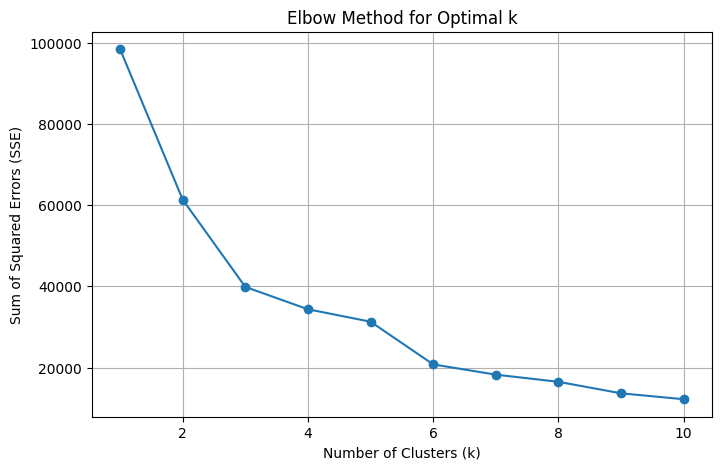

In [25]:
sse = []

cluster_range = range(1, 11)

#Loop through cluster numbers and calculate SSE
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()


We used k=3 in the k-means algorithm because it gives the best tradeoff between simplicity and data representation, capturing meaningful groups without overcomplicating the model.








In [26]:
#Clustering -> 3 Clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_features)
ccs_df['Cluster'] = clusters

In [27]:
#Mean of 3 clusters
cluster_summary = ccs_df.groupby('Cluster').agg({'chargingDuration': 'mean','kWhDelivered': 'mean','paymentRequired': 'mean'}).reset_index()

print(cluster_summary)

   Cluster  chargingDuration  kWhDelivered paymentRequired
0        0          9.434554     10.207512             1.0
1        1          8.274016     34.783132             1.0
2        2          3.103264      8.897393             1.0


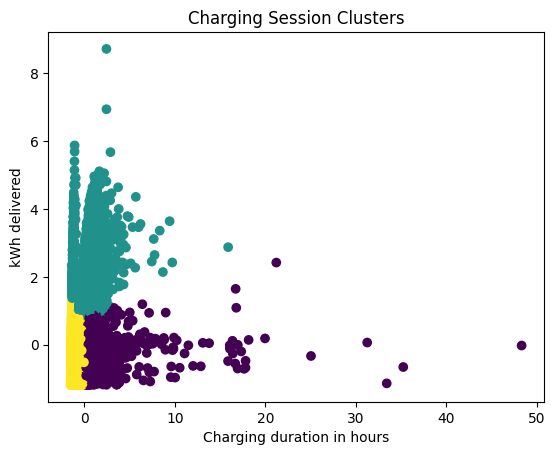

In [28]:
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=clusters, cmap='viridis')

plt.xlabel('Charging duration in hours')
plt.ylabel('kWh delivered')
plt.title('Charging Session Clusters')
plt.show()

###1. Cluster: Private full charges (Purple)
Moderate energy delivered over a long periode of time. Private electric cars could be older on average and therefore not able to have highest energy delivery. Also private cars are longer parked.

###2. Cluster: Modern car full charges (Green)
High energy delivery over a moderate amount of time.

###3. Cluster: Quick Top-Ups (Yellow)
Low energy delivery over a short period of time. Customers could just have used a regular stop that they would have done anyways to load their car.